In [59]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [135]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') 

#### reading in file

In [136]:
df = pd.read_csv("diabetes_selected_features.csv")

In [137]:
df.head()

,age,hypertension,bmi,hbA1c_level,blood_glucose_level,diabetes
0,32.0,0,27.32,5.0,100,0
1,29.0,0,19.95,5.0,90,0
2,18.0,0,23.76,4.8,160,0
3,41.0,0,27.32,4.0,159,0
4,52.0,0,23.75,6.5,90,0


In [138]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [139]:
train_data = df[:int(len(df)*0.8)]
test_data = df[-int(len(df)*0.8):]
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1:]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1:]

#### check the train, test datasets

In [140]:
print(X_train.head(), "\n",
      y_train.head(), "\n",
      X_test.head(), "\n",
      y_test.head()
     )

    age  hypertension    bmi  hbA1c_level  blood_glucose_level
0  32.0             0  27.32          5.0                  100
1  29.0             0  19.95          5.0                   90
2  18.0             0  23.76          4.8                  160
3  41.0             0  27.32          4.0                  159
4  52.0             0  23.75          6.5                   90 
    diabetes
0         0
1         0
2         0
3         0
4         0 
         age  hypertension    bmi  hbA1c_level  blood_glucose_level
20000  65.0             0  26.53          4.5                  100
20001  55.0             1  30.59          5.7                  160
20002  22.0             0  27.32          5.0                   90
20003  32.0             0  33.80          4.5                   80
20004  79.0             0  27.39          6.5                  140 
        diabetes
20000         0
20001         0
20002         0
20003         0
20004         0


In [141]:
# Define variables:
n_estimators = 10
max_depth = 100
random_state = 42

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create and train the RandomForest model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#### Random Forest model accuracy

In [142]:
print(f'{accuracy*100}%')

98.625%


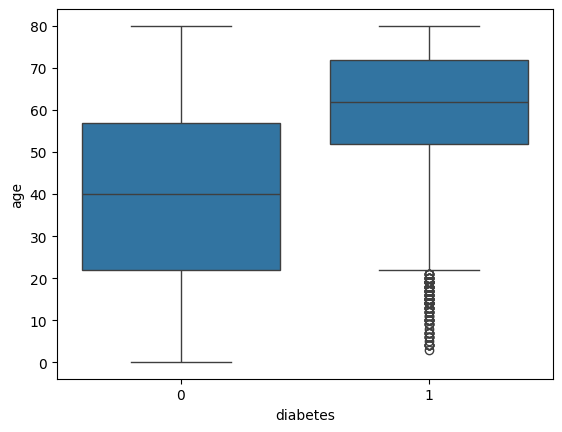

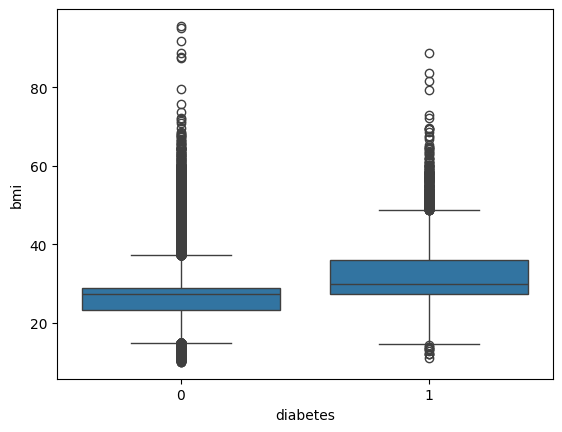

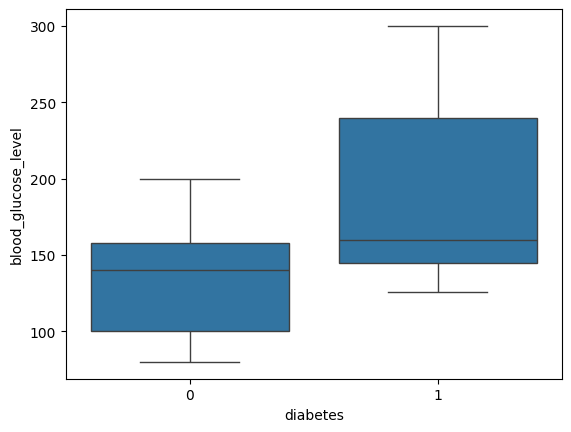

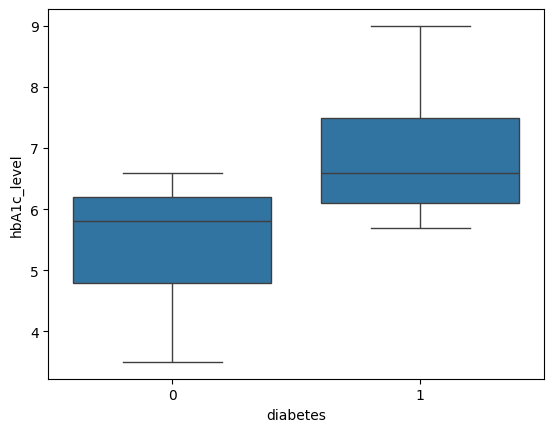

In [144]:
import seaborn as sns
sns.boxplot(x="diabetes", y="age", data=df)
plt.show()
sns.boxplot(x="diabetes", y="bmi", data=df)
plt.show()
sns.boxplot(x="diabetes", y="blood_glucose_level", data=df)
plt.show()
sns.boxplot(x="diabetes", y="hbA1c_level", data=df)
plt.show()

#### Outliers
There are a lot of outliers when comparing the bmi with the Diabetes diagnostic. <br>
Also of note is that Diabetes not necessarily is a disease that appears with the older population, but significantly more likely, with plenty outliers at a younger age. <br>
A higher glucose and hbA1c level are more certain indicators of the disease, and show almost no overlap across the levels in the plots above - the best indicators of Diabetes.


### Making predictions with random data

In [146]:
pred = [[1,0,3,3.3,55]]
print(model.predict(scaler.transform(pd.DataFrame(pred, 
                                            columns=['age', 'hypertension', 'bmi', 'hbA1c_level', 'blood_glucose_level']
                                           )))[0])


0
